In [151]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import matplotlib as mlp
from matplotlib import rcParams
import itertools
import matplotlib.font_manager
import matplotlib.colors as mcolors

## Constant

In [286]:
# unit change 
hour_to_sec = 3600
min_to_sec = 60   
day_to_hour = 24
day_to_sec = day_to_hour*hour_to_sec

# set timestep, duration
t = 10 # [s]   
day = 7
duration = day*day_to_hour # [h]
time_list = [t*i/hour_to_sec for i in range(int(duration*hour_to_sec/t))]

# color
color1 = ['#F45050', '#F9D949']
cmap1 = mcolors.LinearSegmentedColormap.from_list('my_colormap', color1, N=8)


# plot
FS_xlabel = 9
FS_ylabel = 9
Axis_FS = 7
LEG_FS = 6
FS_Annotation = 8

pad_val = 5 # -- 축 숫자와 그래프 축의 간격

# figsize
figsize_x = 10
figsize_y = 7

# handle length
handle_length = 4.5

# width of tick
width_major = 0.4
width_minor = 0.2

# Line 
LW = np.arange(0, 3.0, 0.25)
loosely_dotted = (0, (1, 10))
dotted = (0, (1, 1))
densely_dotted = (0, (1, 1))
long_dash_with_offset = 5, (10, 3)
loosely_dashed = (0, (5, 10))
dashed = (0, (5, 5))
densely_dashed = (0, (5, 1))
loosely_dashdotted = (0, (3, 10, 1, 10))
dashdotted = (0, (3, 5, 1, 5))
densely_dashdotted = (0, (3, 1, 1, 1))
dashdotdotted = (0, (3, 5, 1, 5, 1, 5))
loosely_dashdotdotted = (0, (3, 10, 1, 10, 1, 10))
densely_dashdotdotted = (0, (3, 1, 1, 1, 1, 1))
LS = ['solid',
     dotted,
     densely_dashed,
     densely_dashdotted,
     densely_dashdotdotted,
      ]

## Function

In [188]:
def cm2in(value):
    return value/2.54

## Folder directory

### data import directory

In [189]:
season_dir = "Summer"
conductance_dir = "0.5"
insulation_dir = "EPS"
pos_dir_list = ["inside","center","outside","double"]

### data save directory

## Data processing

### read csv

In [67]:
df_T_right_inside = pd.read_csv(f'../data/{season_dir}/{conductance_dir}/{insulation_dir}/{pos_dir_list[0]}_df_T_right.csv')
df_T_right_center = pd.read_csv(f'../data/{season_dir}/{conductance_dir}/{insulation_dir}/{pos_dir_list[1]}_df_T_right.csv')
df_T_right_outside = pd.read_csv(f'../data/{season_dir}/{conductance_dir}/{insulation_dir}/{pos_dir_list[2]}_df_T_right.csv')
df_T_right_double = pd.read_csv(f'../data/{season_dir}/{conductance_dir}/{insulation_dir}/{pos_dir_list[3]}_df_T_right.csv')

T_right_df_list = [df_T_right_inside, df_T_right_center, df_T_right_outside, df_T_right_double]

df_T_right_all = pd.concat([T_right_df_list[i].iloc[:,[0]] for i in range(4)],axis=1)
# df_T_right_all.rename(columns=[pos_dir_list[0],pos_dir_list[1],pos_dir_list[2],pos_dir_list[3]], inplace= True)
df_T_right_all.columns = [pos_dir_list[0],pos_dir_list[1],pos_dir_list[2],pos_dir_list[3]]

In [264]:
df_q_out_inside = pd.read_csv(f'../data/{season_dir}/{conductance_dir}/{insulation_dir}/{pos_dir_list[0]}_df_q_out.csv')
df_q_out_center = pd.read_csv(f'../data/{season_dir}/{conductance_dir}/{insulation_dir}/{pos_dir_list[1]}_df_q_out.csv')
df_q_out_outside = pd.read_csv(f'../data/{season_dir}/{conductance_dir}/{insulation_dir}/{pos_dir_list[2]}_df_q_out.csv')
df_q_out_double = pd.read_csv(f'../data/{season_dir}/{conductance_dir}/{insulation_dir}/{pos_dir_list[3]}_df_q_out.csv')

q_out_df_list = [df_q_out_inside, df_q_out_center, df_q_out_outside, df_q_out_double]

df_q_out_all = pd.concat([q_out_df_list[i].iloc[:,[0]] for i in range(4)],axis=1)
# df_q_out_all.rename(columns=[pos_dir_list[0],pos_dir_list[1],pos_dir_list[2],pos_dir_list[3]], inplace= True)
df_q_out_all.columns = [pos_dir_list[0],pos_dir_list[1],pos_dir_list[2],pos_dir_list[3]]

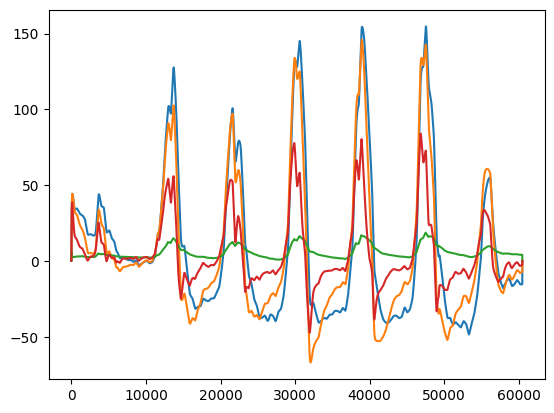

In [303]:
plt.plot(df_q_out_all)

## Plot

### plot dict

In [145]:
T_right_func_dict = {'DF'   : df_T_right_all,
                     'x_max' : 120,
                     'x_min' : 72,
                     'x_int' : 12,
                     'y_max' : 45,
                     'y_min' : 20,
                     'y_int' : 5,
                     }

### plot function

DF_to_plot

In [293]:
def DF_to_plot(DF, Y_label, X_max, X_min, X_int, Y_max, Y_min, Y_int, mean_on_off):
    
    N = DF.shape[1] # 데이터프레임의 열 개수 

    # limit, interval
    nrows = 1
    ncols = 1
    nfigs = nrows*ncols

    fig, ax = plt.subplots(
        nrows, ncols, 
        sharex=False, sharey=False, 
        figsize=(cm2in(figsize_x),cm2in(figsize_y)), 
        facecolor='w', edgecolor='k',
        squeeze=False,
        dpi = 600,
        )
    
    X = time_list
    Y = [DF.iloc[:,[i]] for i in range(N)] # 노드 바꾸면 추가해야 됨
    if mean_on_off == "on":
        mean = DF.mean()[0]
        Y_mean = [mean for _ in range(len(time_list))]
    else: 
        mean = 10**8
        Y_mean = [mean for _ in range(len(time_list))]
         

    color = [cmap1(i*2) for i in range(N)]
    plot_label = [DF.columns.to_list()[i] for i in range(N)]
    line_style = [LS[i] for i in range(N)]

    # tick settings 
    xmax = [X_max]*nfigs 
    xmin = [X_min]*nfigs 
    xint = [X_int]*nfigs 
    xmar = [0]*nfigs

    ymax = [Y_max]*nfigs
    ymin = [Y_min]*nfigs
    yint = [Y_int]*nfigs
    ymar = [0]*nfigs

    xlabel = ["Hour [s]"]*nfigs
    ylabel = [Y_label]*nfigs

    # 플랏 그리기
    for ridx in range(nrows):
        for cidx in range(ncols): 
            for nidx in range(N):  
            # figure index 
                idx = ncols*ridx + cidx
            
                ax[ridx, cidx].plot(
                X,
                Y[nidx],
                c = color[nidx],
                lw = LW[3],
                label = plot_label[nidx],
                linestyle = line_style[nidx]
                )
                ax[ridx, cidx].plot(
                X,
                Y_mean,
                c = 'orange',
                lw = LW[3],
                linestyle = line_style[nidx]
                )
            
            # # 라벨 설정
            ax[ridx,cidx].set_xlabel(f'{xlabel[idx]}', fontsize=FS_xlabel)
            ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS_ylabel)
            
            # 축 눈금 및 라벨 크기 설정
            ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='major', width=0.5, pad = pad_val)
            ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='minor', width=0.35, pad = pad_val)
            
            # 축 위치 설정 
            ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx])) 
            ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx])) 
            
            # x,y 값 제한 
            ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
            ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx]+ymar[idx])
            ax[ridx,cidx].margins(x=0, y=0.1)
            
            # 보조 눈금의 수
            ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
            ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
            
            # 그리드 설정 
            ax[ridx,cidx].grid(True, axis='both', linestyle=':', linewidth=LW[2], color='0.25', alpha = 0.2);    
            
            # legend 
            handles, labels = ax[ridx,cidx].get_legend_handles_labels()
            legorder1 = range(len(handles))
            ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                                [labels[idx] for idx in legorder1], 
                                loc='lower right', ncol=4, frameon=False, 
                                edgecolor='None', facecolor='None',
                                fontsize=LEG_FS, fancybox=False, 
                                columnspacing= 1.05, labelspacing=0.4)
        
            # 그래프 외곽 라인 설정     
            for k in ['top','bottom','left','right']:
                    ax[ridx,cidx].spines[k].set_visible(True)
                    ax[ridx,cidx].spines[k].set_linewidth(0.5)
                    ax[ridx,cidx].spines[k].set_color('k')  
                    
    # Margin adjustment.
    fig.align_labels()
    fig.tight_layout(pad=0.2, h_pad=0.2)
    plt.subplots_adjust(hspace=0.35, wspace=0.35)

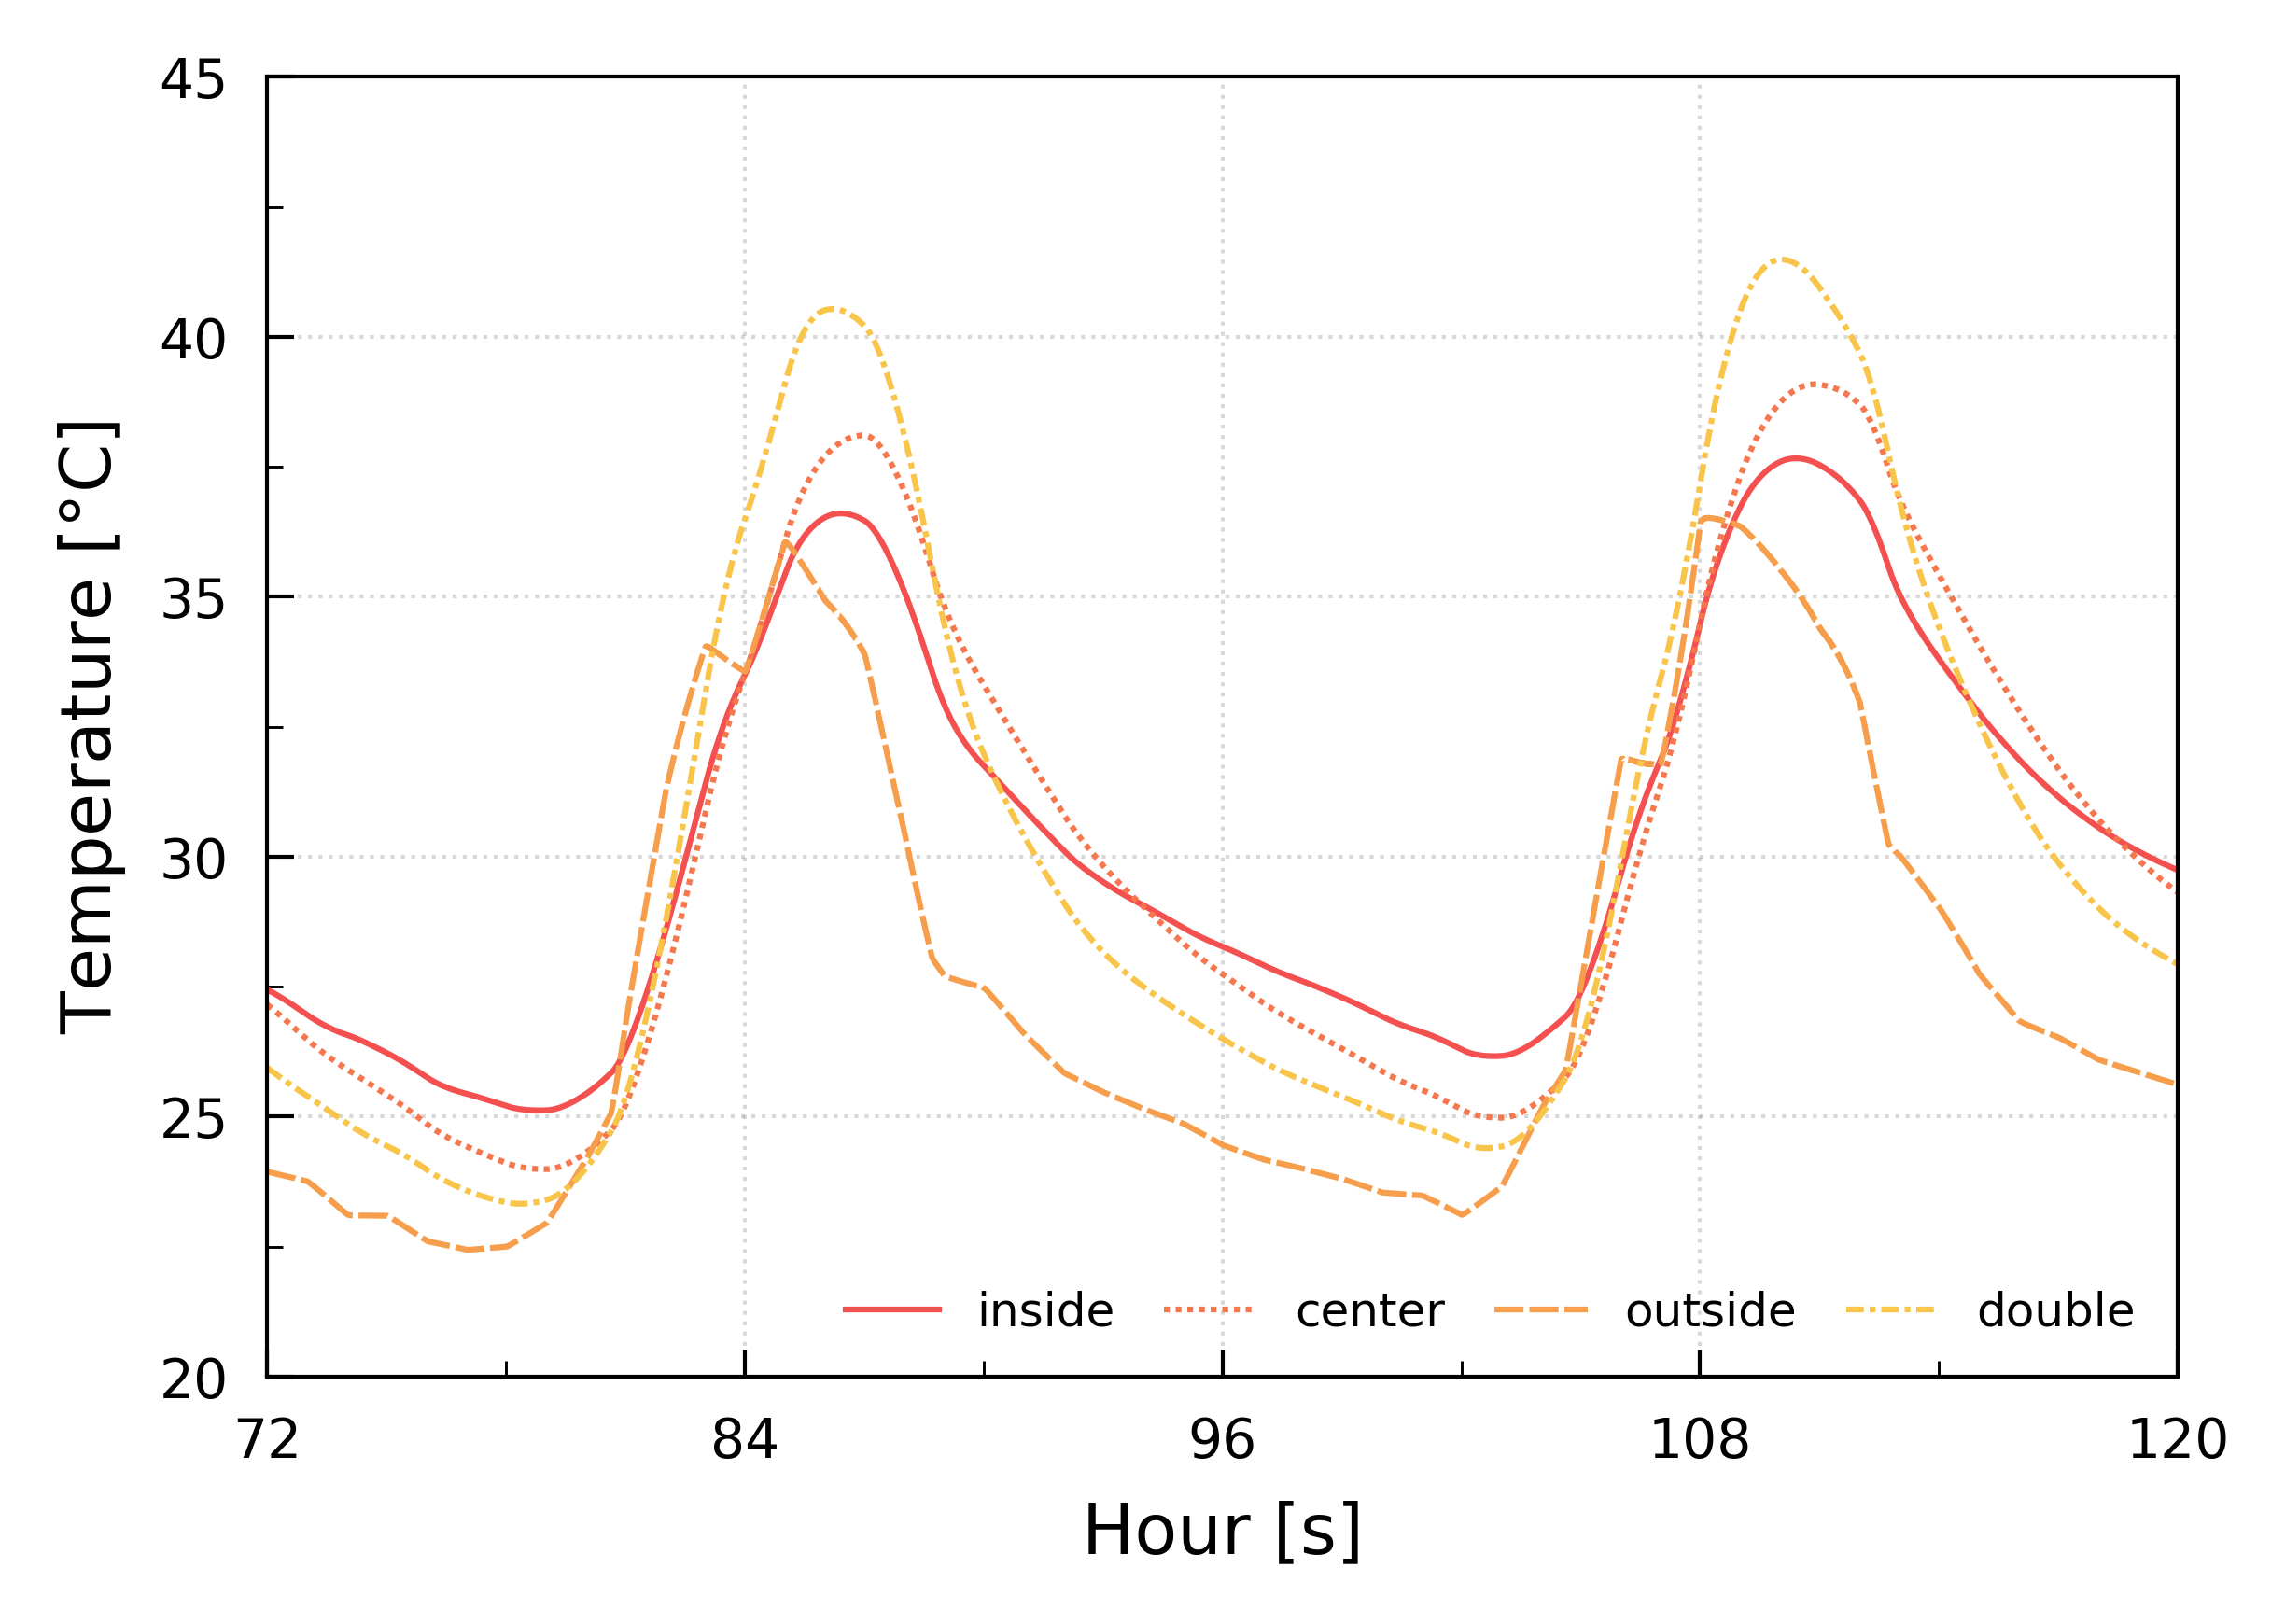

In [302]:
DF_to_plot(df_T_right_all, r"Temperature $\mathrm{[\degree C]}$",120,72,12,45,20,5,"off")

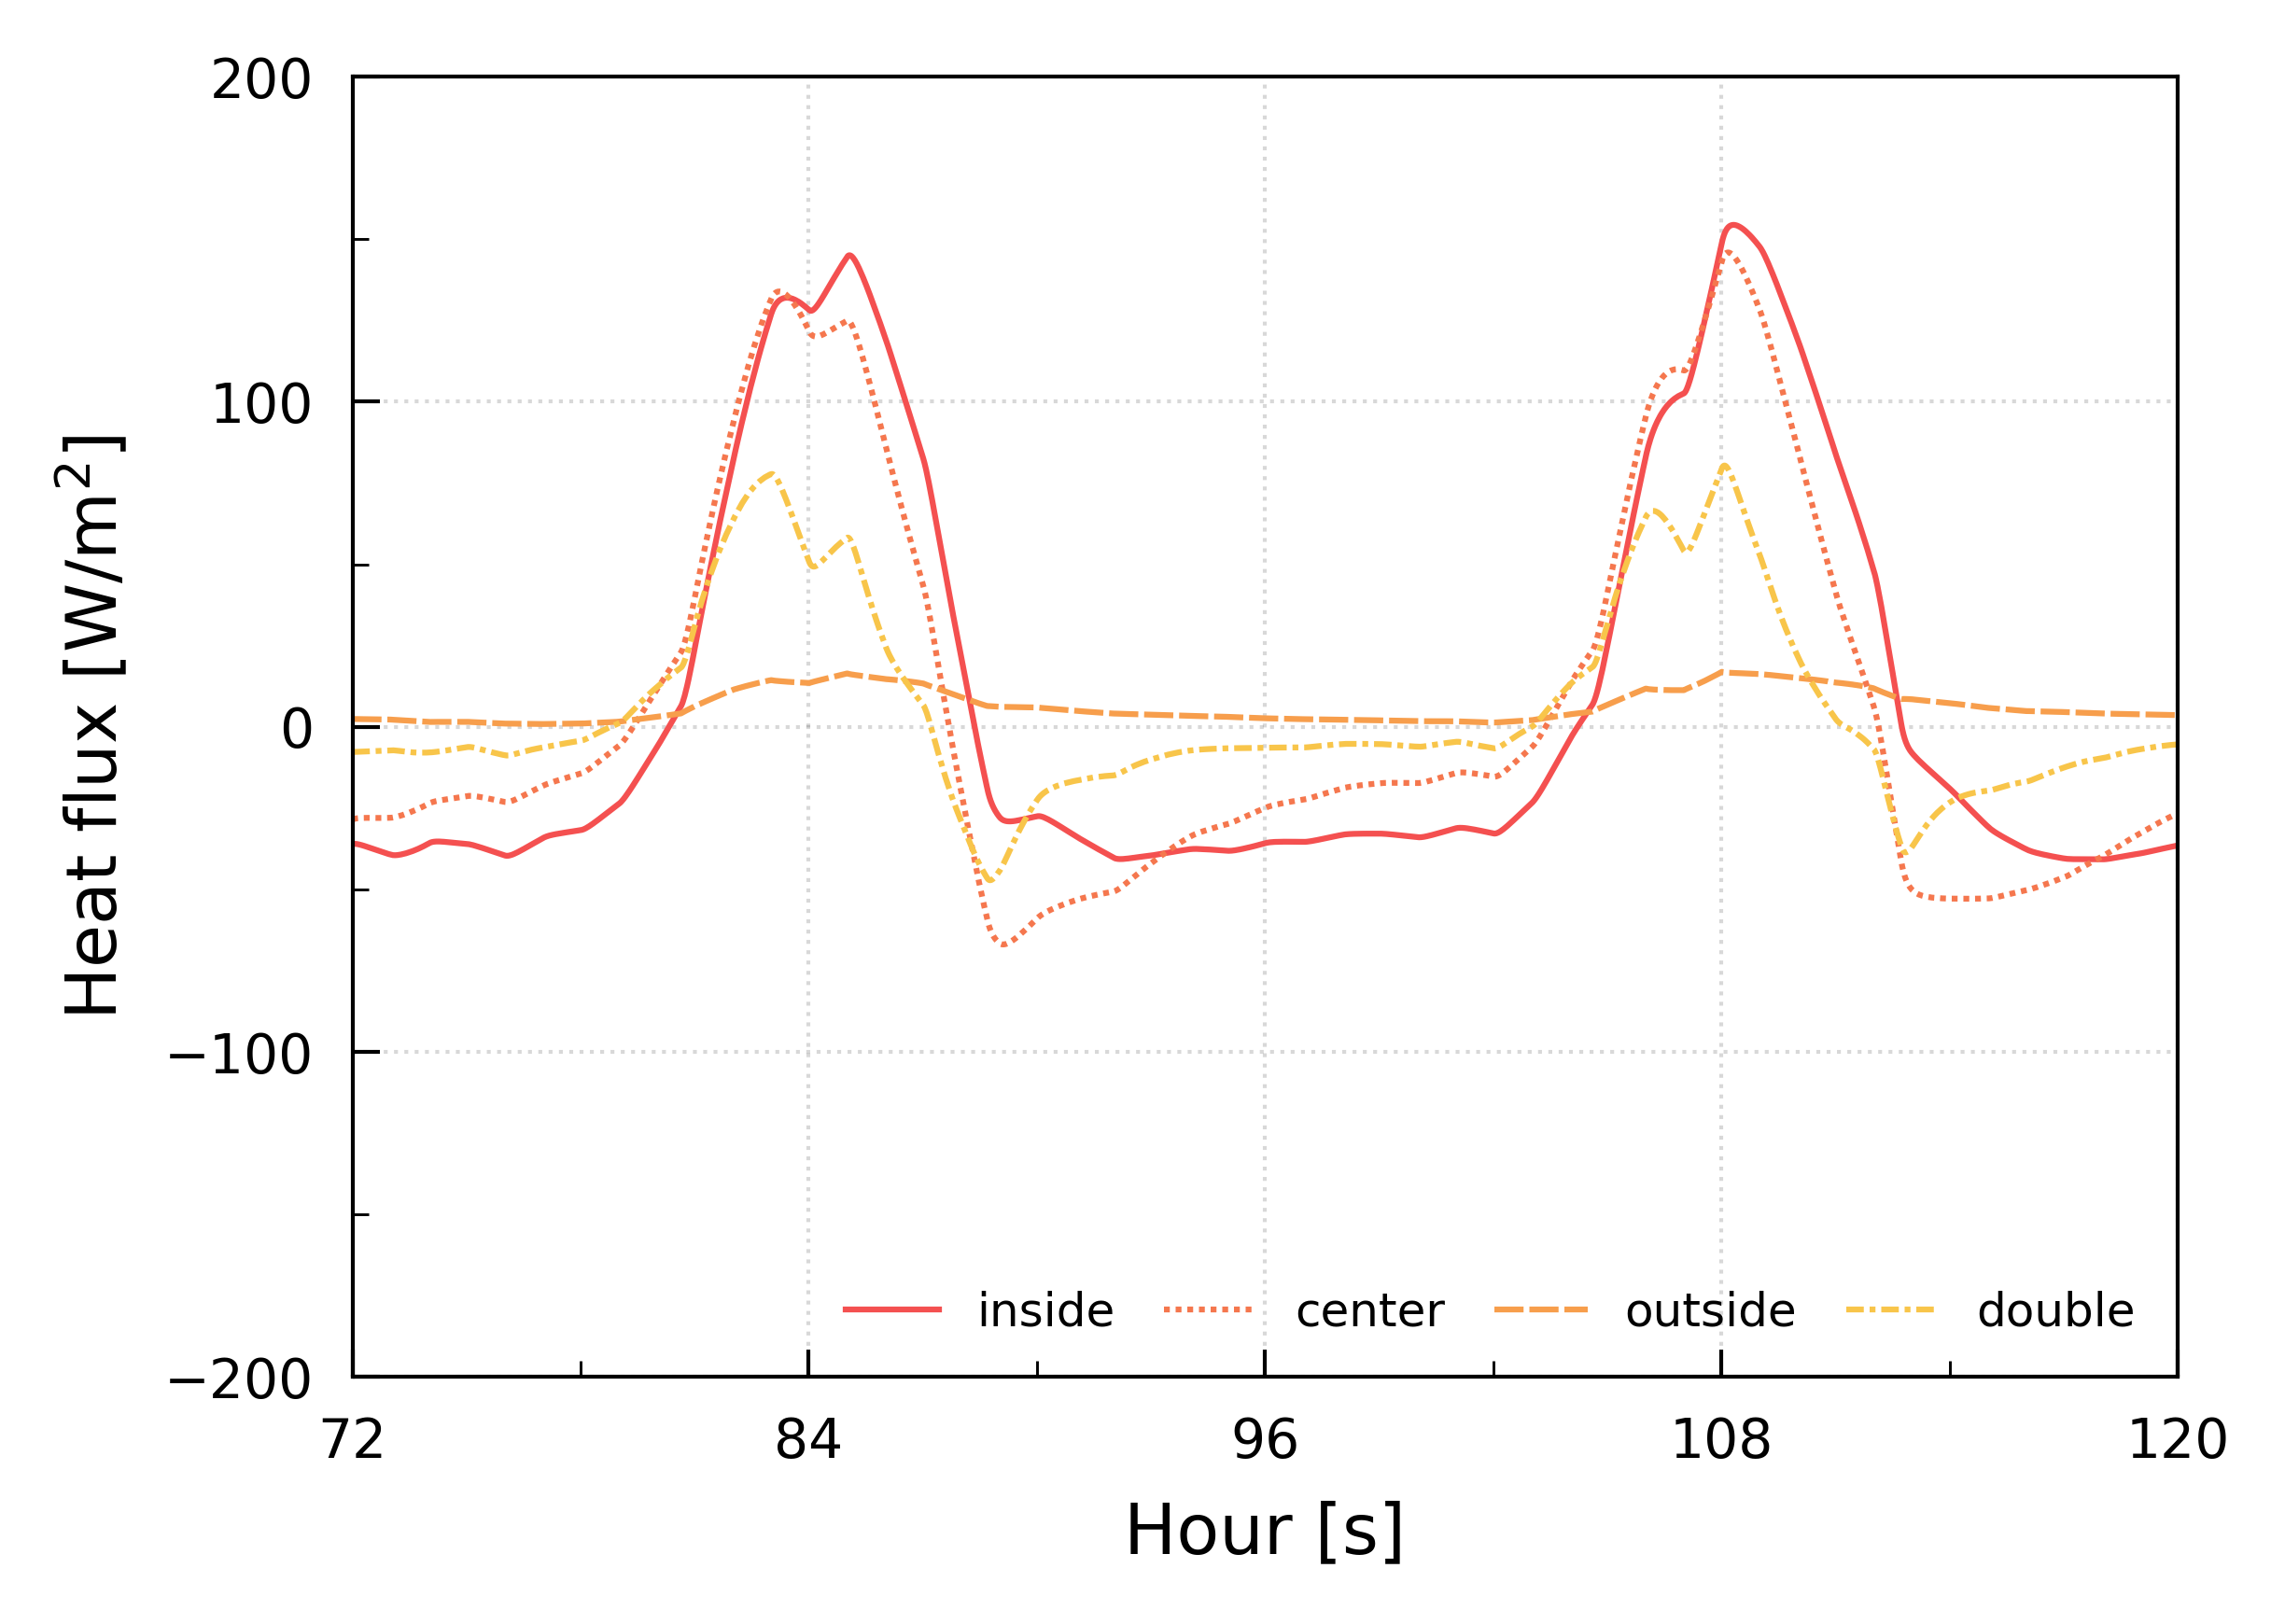

In [301]:
DF_to_plot(df_q_out_all, r"Heat flux $\mathrm{[W/m^2]}$", 120, 72, 12, 200, -200, 100, "off")

## Test

In [199]:
from cProfile import label

def plot(node1, node_count, plot_label):
    
    N = node_count # 노드 개수 (플랏 몇 번 그릴 건지)

    # Y_max
    Y_max = 80 #max(node1.max().max(), node2.max().max()) # 노드 추가하면 맥스 함수 추가해줘야 함

    # Y_min
    Y_min = -30

    # decimal index 소숫점 제거해주기 
    d_idx = 10


    # Y_int
    Y_int = int((Y_max - Y_min)/(N*d_idx))*d_idx

    nrows = 1
    ncols = 1
    nfigs = nrows*ncols

    fig, ax = plt.subplots(
        nrows, ncols, 
        sharex=False, sharey=False, 
        figsize=(cm2in(16),cm2in(9)), 
        facecolor='w', edgecolor='k',
        squeeze=False,
        dpi = 600,
        )

    
    plot_x = time_list
    plot_y = [node1] # 노드 바꾸면 추가해야 됨
    color = ['#01579B','#FFD95A', '#4FC3F7', '#FFD95A']
    plot_label = plot_label

    # tick settings 
    xmin = [0]*nfigs #tick minimum value, nfig 갯수만큼 [ ] 생성 
    xmax = [duration]*nfigs #tick max value
    xint = [duration/6]*nfigs #tick Y_int
    xmar = [0]*nfigs

    ymin = [Y_min]*nfigs
    ymax = [Y_max + 1]*nfigs
    yint = [20]*nfigs
    ymar = [0]*nfigs

    xlabel = ["Hour [s]"]*nfigs
    ylabel = ["Heat Flux [W/m2]"]*nfigs

    # 플랏 그리기
    for ridx in range(nrows):
        for cidx in range(ncols): 
            for i in range(N):  
            # figure index 
                idx = ncols*ridx + cidx
            
                ax[ridx, cidx].plot(
                plot_x,
                plot_y[i],
                c = color[i],
                lw = LW[3],
                label = plot_label[i]
                )
            
            # # 라벨 설정
            ax[ridx,cidx].set_xlabel(f'{xlabel[idx]}', fontsize=FS)
            ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS)
            
            # 축 눈금 및 라벨 크기 설정
            ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='major', width=0.5)
            ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='minor', width=0.35)
            
            # 축 위치 설정 
            ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx])) 
            ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx])) 
            
            # x,y 값 제한 
            ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
            ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx]+ymar[idx])
            ax[ridx,cidx].margins(x=0, y=0.1)
            
            # 보조 눈금의 수
            ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
            ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(1))
            
            # 그리드 설정 
            ax[ridx,cidx].grid(True, axis='both', linestyle='--', linewidth=LW[1], color='0.25');    
            
            # legend 
            handles, labels = ax[ridx,cidx].get_legend_handles_labels()
            legorder1 = range(len(handles))
            ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                                [labels[idx] for idx in legorder1], 
                                loc='upper right', ncol=1, bbox_to_anchor=(0.96, 0.99), frameon=False, 
                                edgecolor='None', facecolor='None',
                                fontsize=LEG_FS, fancybox=False, 
                                columnspacing= 1.05, labelspacing=0.4)
        
            # 그래프 외곽 라인 설정     
            for k in ['top','bottom','left','right']:
                    ax[ridx,cidx].spines[k].set_visible(True)
                    ax[ridx,cidx].spines[k].set_linewidth(0.5)
                    ax[ridx,cidx].spines[k].set_color('k')  
                    
    # Margin adjustment.
    fig.align_labels()
    fig.tight_layout(pad=0.2, h_pad=0.2)
    plt.subplots_adjust(hspace=0.35, wspace=0.35)

In [ ]:
df_q_out_inside = pd.read_csv(f'../data/{season_dir}/{conductance_dir}/{insulation_dir}/{pos_dir_list[0]}_df_q_out.csv')
df_q_out_center = pd.read_csv(f'../data/{season_dir}/{conductance_dir}/{insulation_dir}/{pos_dir_list[1]}_df_q_out.csv')
df_q_out_outside = pd.read_csv(f'../data/{season_dir}/{conductance_dir}/{insulation_dir}/{pos_dir_list[2]}_df_q_out.csv')
df_q_out_double = pd.read_csv(f'../data/{season_dir}/{conductance_dir}/{insulation_dir}/{pos_dir_list[3]}_df_q_out.csv')

q_out_df_list = [df_q_out_inside, df_q_out_center, df_q_out_outside, df_q_out_double]

df_q_out_all = pd.concat([q_out_df_list[i].iloc[:,[0]] for i in range(4)],axis=1)
# df_q_out_all.rename(columns=[pos_dir_list[0],pos_dir_list[1],pos_dir_list[2],pos_dir_list[3]], inplace= True)
df_q_out_all.columns = [pos_dir_list[0],pos_dir_list[1],pos_dir_list[2],pos_dir_list[3]]